In [1]:
import sys
sys.path.append('../')
from Linearity import Neuron
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
voltageClampFiles = '/media/sahil/NCBS_Shares_BGStim/patch_data/voltage_clamp_files.txt'
with open (voltageClampFiles,'r') as r:
    dirnames = r.read().splitlines()

In [114]:
def simpleaxis(axes, every=False, outward=False):
    if not isinstance(axes, (list, np.ndarray)):
        axes = np.array([axes])
    for ax in np.array(axes).flatten():
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        if (outward):
            ax.spines['bottom'].set_position(('outward', 10))
            ax.spines['left'].set_position(('outward', 10))
        if every:
            ax.spines['bottom'].set_visible(False)
            ax.spines['left'].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_title('')

In [3]:
neurons = []
for dirname in dirnames:
    cellIndex = dirname.split('/')[-2]
    filename = dirname + 'plots/' + cellIndex +  '_fits.pkl'
    if os.path.exists(filename):
        try:
            neurons.append(Neuron.load(filename))
        except:
            pass

In [4]:
#Colorscheme for cells
color_cell = matplotlib.cm.plasma(np.linspace(0,1,len(dirnames)))

In [63]:
e_r, e_d, i_r, i_d, g_e, g_i, del_i = [], [], [], [], [], [], []
for index, n in enumerate(neurons):
    coord_e_r, coord_e_d, coord_i_r, coord_i_d, coord_g_e, coord_g_i, coord_e_t_0, coord_i_t_0 = {}, {}, {}, {}, {}, {}, {}, {}
    for expType, experiment in n:
        if expType == 1:
            for sqr in experiment:
                for coord in experiment[sqr].coordwise:
                    coord_e_r[coord] = []
                    coord_e_d[coord] = []
                    coord_g_e[coord] = []
                    coord_e_t_0[coord] = []
                    for trial in experiment[sqr].coordwise[coord].trials:
                        if hasattr(trial, 'fit'):
                            if not trial.fit == None:
#                                 e_r.append(trial.fit['tOn'].value)
#                                 e_d.append(trial.fit['tOff'].value)
#                                 g_e.append(trial.fit['g_max'].value)
                                coord_e_r[coord].append(trial.fit['tOn'].value)
                                coord_e_d[coord].append(trial.fit['tOff'].value)
                                coord_g_e[coord].append(trial.fit['g_max'].value)
                                coord_e_t_0[coord].append(trial.fit['t_0'].value)
                    coord_e_r[coord] = np.nanmean(coord_e_r[coord])
                    coord_e_d[coord] = np.nanmean(coord_e_d[coord])
                    coord_g_e[coord] = np.nanmean(coord_g_e[coord])
                    coord_e_t_0[coord] = np.nanmean(coord_e_t_0[coord])
        if expType == 2:
            for sqr in experiment:
                for coord in experiment[sqr].coordwise:
                    coord_i_r[coord] = []
                    coord_i_d[coord] = []
                    coord_g_i[coord] = []
                    coord_i_t_0[coord] = []
                    for trial in experiment[sqr].coordwise[coord].trials:
                        if hasattr(trial, 'fit'):
                            if not trial.fit == None:
#                                 i_r.append(trial.fit['tOn'].value)
#                                 i_d.append(trial.fit['tOff'].value)
#                                 g_i.append(trial.fit['g_max'].value)
                                coord_i_r[coord].append(trial.fit['tOn'].value)
                                coord_i_d[coord].append(trial.fit['tOff'].value)
                                coord_g_i[coord].append(trial.fit['g_max'].value)
                                coord_i_t_0[coord].append(trial.fit['t_0'].value)
                    coord_i_r[coord] = np.nanmean(coord_i_r[coord])
                    coord_i_d[coord] = np.nanmean(coord_i_d[coord])
                    coord_g_i[coord] = np.nanmean(coord_g_i[coord])
                    coord_i_t_0[coord] = np.nanmean(coord_i_t_0[coord])
        
    for coord in coord_e_r:
        if not any(np.isnan([coord_e_r[coord],coord_e_d[coord],coord_i_r[coord],coord_i_d[coord],coord_g_e[coord],coord_g_i[coord],coord_e_t_0[coord],coord_i_t_0[coord]])):
            e_r.append(coord_e_r[coord])
            e_d.append(coord_e_d[coord])
            i_r.append(coord_i_r[coord])
            i_d.append(coord_i_d[coord])
            g_e.append(coord_g_e[coord])
            g_i.append(coord_g_i[coord])
            del_i.append(coord_i_t_0[coord] - coord_e_t_0[coord])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


In [64]:
e_r, e_d, i_r, i_d, g_e, g_i, del_i = [np.array(x) for x in [e_r, e_d, i_r, i_d, g_e, g_i, del_i]]

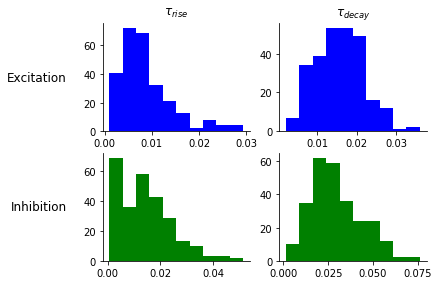

In [119]:
fig, ax = plt.subplots(2,2)

ax[0][0].hist(e_r,color='b')
ax[0][1].hist(e_d,color='b')
ax[1][0].hist(i_r,color='g')
ax[1][1].hist(i_d,color='g')

cols = ['{}'.format(col) for col in ["$\\tau_{rise}$", "$\\tau_{decay}$"]]
rows = ['{}'.format(row) for row in ["Excitation", "Inhibition"]]

pad = 8 # in points

for axis, col in zip(ax[0], cols):
    axis.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for axis, row in zip(ax[:,0], rows):
    axis.annotate(row, xy=(0, 0.5), xytext=(-axis.yaxis.labelpad - pad, 0),
                xycoords=axis.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')
    
fig.subplots_adjust(left=0.15, top=0.95)
simpleaxis(ax)
plt.show()

In [66]:
print("median = {}, quartiles = {}, {}".format(np.median(e_r), np.percentile(e_r, q=25), np.percentile(e_r, q=75)))
print("median = {}, quartiles = {}, {}".format(np.median(e_d), np.percentile(e_d, q=25), np.percentile(e_d, q=75)))
print("median = {}, quartiles = {}, {}".format(np.median(i_r), np.percentile(i_r, q=25), np.percentile(i_r, q=75)))
print("median = {}, quartiles = {}, {}".format(np.median(i_d), np.percentile(i_d, q=25), np.percentile(i_d, q=75)))

median = 0.00710526732609, quartiles = 0.00502451986118, 0.0106960611012
median = 0.0156870870024, quartiles = 0.0113340266873, 0.0197965932879
median = 0.0133914947883, quartiles = 0.00540287807902, 0.0196850934215
median = 0.0272130350763, quartiles = 0.0195695083322, 0.0379834735785


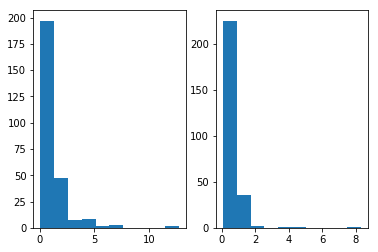

0.588381925943


In [67]:
fig, ax = plt.subplots(1,2)
ax[0].hist(e_r/i_r)
ax[1].hist(e_d/i_d)
plt.show()
print (np.median(e_r/i_r))

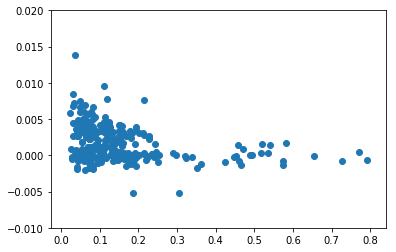

In [71]:
fig, ax = plt.subplots()
ax.scatter(g_e*1e6, del_i)
ax.set_ylim(-0.01,0.02)
plt.show()

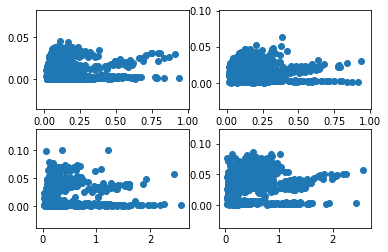

In [32]:
fig, ax = plt.subplots(2,2)
ax[0][0].scatter(g_e*1e6, e_r)
ax[0][1].scatter(g_e*1e6, e_d)
ax[1][0].scatter(g_i*1e6, i_r)
ax[1][1].scatter(g_i*1e6, i_d)
plt.show()
# print("median = {}, quartiles = {}, {}".format(np.median(ratio_e), np.percentile(ratio_e, q=25), np.percentile(ratio_e, q=75)))
# print("median = {}, quartiles = {}, {}".format(np.median(ratio_i), np.percentile(ratio_i, q=25), np.percentile(ratio_i, q=75)))

In [8]:
# all_delays = []
# all_conductances = []
# all_inh_conductances = []
# scalingFactor = 1e6
# for index, n in enumerate(neurons):
#     avg_exc_onset = {}
#     avg_inh_onset = {}
#     avg_exc_max = {}
#     exc_onsets, inh_onsets = {}, {}
#     exc_max,inh_max = {}, {}
#     err_inh_onsets = {}
#     for expType, experiment in n:
#         for sqr in experiment:
#             for coord in experiment[sqr].coordwise:
#                 if expType == 1:
#                     exc_onsets[(sqr,coord)] = []
#                     exc_max[(sqr,coord)] = []
#                     for trial in experiment[sqr].coordwise[coord].trials:
#                         onsetTime = findOnsetTime(trial)
#                         if onsetTime:
#                             exc_onsets[(sqr,coord)].append(onsetTime*1e3)
#                             exc_max[(sqr,coord)].append(-trial.feature[5]*scalingFactor)
#                             #exp[sqr].coordwise[coord].average_feature[5]
#                     exc_onsets[(sqr,coord)] = numpy.nanmean(exc_onsets[(sqr,coord)])
#                     exc_max[(sqr,coord)] = numpy.nanmean(exc_max[(sqr,coord)])
                        
#                 if expType == 2:
#                     inh_onsets[(sqr,coord)] = []
#                     inh_max[(sqr,coord)] = []
#                     #list_inh_onset = []
#                     for trial in experiment[sqr].coordwise[coord].trials:
#                         onsetTime = findOnsetTime(trial)
#                         if onsetTime:
#                             inh_onsets[(sqr,coord)].append(onsetTime*1e3)
#                             #list_inh_onset.append(onsetTime*1e3)
#                             inh_max[(sqr,coord)].append(trial.feature[0]*scalingFactor)
#                     #avg_onset = numpy.nanmean([onset for onset in list_inh_onset if onset])
#                     #err_onset = numpy.nanstd([onset for onset in list_inh_onset if onset])
# #                     for trial in exp[sqr].coordwise[coord].trials:
# #                         avg_inh_onset[(sqr,trial.index)] = avg_onset
# #                         err_inh_onsets[(sqr,trial.index)] = err_onset
#                     inh_onsets[(sqr,coord)] = numpy.nanmean(inh_onsets[(sqr,coord)])
#                     inh_max[(sqr,coord)] = numpy.nanmean(inh_max[(sqr,coord)])
                        
#     delay, max_conductance, max_inh_conductance = [], [], []
# #     del_err, max_err= [], []
#     inhibOnset = []
#     conductanceConversion = 70e-3
#     for key in set(exc_onsets).intersection(set(inh_onsets)):
#         if inh_onsets[key] and exc_onsets[key]:
# #             print ("Doing {}".format(index))
# #             print (inh_onsets[key], exc_onsets[key], exc_max[key])
#             if not numpy.isnan(inh_onsets[key]) and not numpy.isnan (exc_onsets[key]) and not numpy.isnan (exc_max[key]) and not numpy.isnan (inh_max[key]):
# #                 print ("Delay is {}".format(inh_onsets[key]- exc_onsets[key]))
#                 delay.append(inh_onsets[key]- exc_onsets[key])
#                 max_conductance.append(exc_max[key]/conductanceConversion)
#                 max_inh_conductance.append(inh_max[key]/conductanceConversion)
#     all_delays.append(delay)
#     all_conductances.append(max_conductance)
#     all_inh_conductances.append(max_inh_conductance)
#     print ("Done {}".format(index))